# K-means on MNIST
## (only for digits: 6,7,8,9)

### author: Konstantinos Nikopoulos



## Import necessary libraries

In [1]:
############################### Import libraries #############################################

import keras
import numpy as np
import matplotlib
import matplotlib.pyplot
import sys
from keras.datasets import mnist
from math import sqrt



Using TensorFlow backend.


## Load MNIST dataset and keep the digits: 6,7,8,9     
## Create arrays: M for train, N for test, Ltr for train labels, Lte for test labels    

In [2]:
################################ Preprocess dataset ###########################################

# M = X train
# N = X test
# Ltr = Y train
# Lte = Y test

# Load MNIST
(M, Ltr), (N, Lte) = mnist.load_data()

print("shape of data:", M.shape, N.shape) #(60000, 28, 28) (10000, 28, 28)
print("shape of labels:", Ltr.shape, Lte.shape) #(60000,) (10000,) 

# Keep only the digits 6,7,8,9
train_mask = np.isin(Ltr, [6, 7, 8, 9])
test_mask = np.isin(Lte, [6, 7, 8, 9])
M, Ltr = M[train_mask], Ltr[train_mask]
N, Lte = N[test_mask], Lte[test_mask]

# For simplify operations transform 6,7,8,9 to 0,1,2,3
for i in range(0,len(Ltr)):
    Ltr[i] = Ltr[i] - 6
for i in range(0,len(Lte)):
    Lte[i] = Lte[i] - 6
    
print("new shape of data:", M.shape, N.shape) 
print("new shape of labels:", Ltr.shape, Lte.shape)

shape of data: (60000, 28, 28) (10000, 28, 28)
shape of labels: (60000,) (10000,)
new shape of data: (23983, 28, 28) (3969, 28, 28)
new shape of labels: (23983,) (3969,)


## Implement:     
## 1) a function for average brightness of rows and columns    
## 2) a function for scatter plot points    
## 3) Maximin algorithm    
## 4) Kmeans algorithm    


In [3]:
############################### Algorithms and functions ######################################

# Calculates the average brightness of rows and
# columns for every image
def average_brightness(M):
    m = [0] * len(M)
    for i in range(0,len(M)):
        sumX = 0
        sumY = 0
        for x in range (0,28):
            countX = 0
            countY = 0
            for y in range (0,28):
                countX = countX + M[i][x][y]
                countY = countY + M[i][y][x]
            sumX = sumX + countX
            sumY = sumY + countY
        avX = sumX/28
        avY = sumY/28
        m[i] = [avX,avY]
    return m

# Prints m to a scatter plot 
def scatter_plot(m,L):
    x = []
    y = []
    colors = ['red', 'green', 'blue', 'yellow']
    for point in m:
        x.append(point[0])
        y.append(point[1])
    matplotlib.pyplot.scatter(x, y, c=L, cmap=matplotlib.colors.ListedColormap(colors))

# Euclidean distance
def euclidean_distance(a,b):
    sum_squares = 0
    for i in range(0,len(a)):
        sum_squares = sum_squares + (a[i]-b[i])**2
    return sqrt(sum_squares)

# Maximin algorithm
def Maximin(m,c):
    dist = np.zeros(len(m))
    k = [0] * c
    k[0] = m[0] # first centre
    # Finds second centre. It is the farthest of first centre.
    for i in range(0,len(m)):
        dist[i] = euclidean_distance(k[0],m[i])
    index_k2 = np.argmax(dist)
    k[1] = m[index_k2] # second centre
    # Finds other centres
    j=1 
    while(j < c-1):
        for i in range(0,len(m)):
            newdist = euclidean_distance(k[j],m[i]) 
            if (newdist < dist[i]):
                dist[i] = newdist
        index_new_k = np.argmax(dist)
        j = j+1
        k[j] = m[index_new_k] # new centre
    return k[0],k[1],k[2],k[3]

# Kmeans algorithm
def Kmeans(m, k1, k2, k3, k4):
    k = [k1,k2,k3,k4]
    clusters = [[],[],[],[]]
    dist = np.zeros((len(m),4))
    which_cluster = np.zeros(len(m))
    for rounds in range(0,1):
        # Finds closest centroid for each point (clustering)
        for i in range(0,len(m)):
            mindist = euclidean_distance(k[0],m[i]) 
            for j in range(0,len(k)):
                dist[i][j] = euclidean_distance(k[j],m[i]) 
                if (dist[i][j] < mindist):
                    mindist = dist[i][j]
                    which_cluster[i] = j
                    clusters[j].append(m[i])
        # Finds new centroids
        for i in range(0,len(k)):
            k[i]=[0,0]
            for j in range(0,len(clusters[i])):
                k[i][0]=k[i][0]+clusters[i][j][0]
                k[i][1]=k[i][1]+clusters[i][j][1]
            if(len(clusters[i])>0):
                k[i][0]=k[i][0]/len(clusters[i])
                k[i][1]=k[i][1]/len(clusters[i])
            clusters[i].clear()
        clusters = [[],[],[],[]]
    return k[0],k[1],k[2],k[3],which_cluster


## Make an array m who keeps for each image the average brightness of rows and columns.      
## Make a scatter plot for m.     
## ( occurs avg br of rows = avg br of columns )    

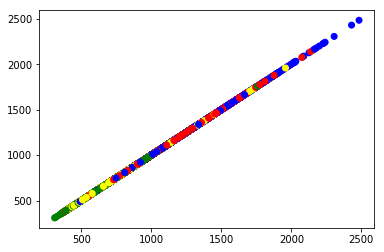

In [4]:
# Calculates m
m = average_brightness(M)

# Scatter plot 
scatter_plot(m,Ltr)

## Maximin on m to find first centers    
## Kmeans on m with previous centers as start    
## Scatter plot to result    

Centers by Maximin:
[829.0714285714286, 829.0714285714286] [2483.9285714285716, 2483.9285714285716] [1657.25, 1657.25] [308.5, 308.5]
Centers by Kmeans:
[0, 0] [1799.3019157994322, 1799.3019157994322] [1420.852372271417, 1420.852372271417] [502.60738548136675, 502.60738548136675]


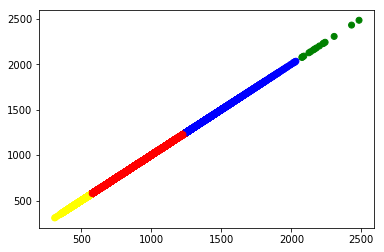

In [5]:
# Maximin
k1, k2, k3, k4 = Maximin(m,4)
print("Centers by Maximin:")
print(k1,k2,k3,k4)

# Kmeans
k1, k2, k3, k4, Ltr_new = Kmeans(m,k1,k2,k3,k4)    
print("Centers by Kmeans:")
print(k1,k2,k3,k4)

# Scatter plot of result
scatter_plot(m,Ltr_new)
